In [1]:
import numpy as np 
import pywt
import matplotlib.pyplot as plt

In [2]:
def get_nabla_f(sigma, y):
    """Returns the gradient of the function f w.r.t to X 
    """
    # Precalculate variables to save time
    psi_y, _ = pywt.coeffs_to_array(pywt.wavedec2(y, 'haar', level=4))
    def nabla_f(X):
        return - (psi_y - X) / sigma_2
    
    return nabla_f

In [3]:
def proximal(X, theta):
    """Computes the proximal operator parametrized by lambda and theta^T * g of X     
    
    Note:   Our prox operator of x is argmin_{\bar{x}}(\theta * |\bar{x}| + \frac{\bar{x} - x}{2\lambda})
            which is equivalent to argmin_{\bar{x}}(\theta * \lambda * |\bar{x}| + \frac{\bar{x} - x}{2})
            
    The code below represents the hand calculated solution we found for the argmin
    """
    X_bar = np.copy(X)
    for i in range(len(X)):
        for j in range(len(X[0])):
            sign = 1 if X_bar[i, j] > 0 else -1
            X_bar[i, j] = sign * max(0, np.absolute(X_bar[i, j]) - lambd * theta)
    return X_bar

In [4]:
def myula_kernel(X, nabla_f, theta):
    """Returns the new value of X based on the MYULA kernel
    """
    Z = np.random.normal(size=X.shape)
    return X - gamma * nabla_f(X) - gamma * (X - proximal(X, theta))/lambd + np.sqrt(2*gamma) * Z

In [5]:
def projection(a):
    return 0.000001 if a < 0 else a

In [6]:
def sapg_scalar_homogeneous(theta_0, X, nabla_f, N):
    """SAPG Algorithm for scalar theta and alpha positively homogeneous regularizer g"""
    thetas = [theta_0]
    theta = theta_0
    thingy = theta_0
    for i in range(N):
        delta = (i+1)**(-beta) / (theta_0 * dim_X**2)
        X = myula_kernel(X, nabla_f, thetas[i])
        theta = projection(theta + delta * (dim_X**2 / theta - np.linalg.norm(X.reshape(-1), ord=1))) # g(x) = |x|_1
        thetas.append(theta)
    return np.mean(thetas), thetas

In [7]:
def generate_data(scale):
    x_0 = np.random.laplace(size=(dim_X, dim_X))
    x = x_0 + np.random.normal(size=(dim_X, dim_X), scale=scale)
    print(10 * np.log(np.linalg.norm(x.reshape(-1)) / np.linalg.norm(x.reshape(-1) - x_0.reshape(-1))))
    coeffs = pywt.array_to_coeffs(x, slices, output_format='wavedec2')
    y = pywt.waverec2(coeffs, 'haar')
    
    return x, y

In [8]:
N = 40
beta = 0.8
dim_Y = 256
dim_X = 256
d = dim_Y**2
theta_0 = 0.5

# Get the slices
dummy_coeff = pywt.wavedec2(np.ones((dim_Y ,dim_Y)), 'haar', level=4)
_, slices = pywt.coeffs_to_array(dummy_coeff)

In [9]:
# Define Parameters for the Algorithm
sigma_2 = 0.0375 #SNR = 20 -> sigma_2 is approx 0.0375
L_y = 1/sigma_2
lambd = min(5 * 1/L_y, 2.0)
gamma = 0.98 /(L_y + 1/lambd)

In [10]:
_, y = generate_data(np.sqrt(sigma_2))

20.016391955071246


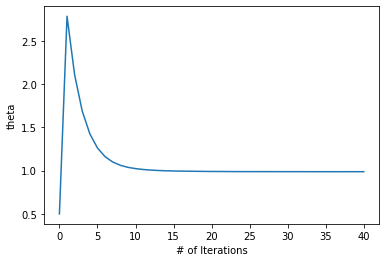

In [11]:
nabla_f = get_nabla_f(sigma_2, y)
X_0 = np.zeros((dim_X, dim_X))
avg_theta, thetas = sapg_scalar_homogeneous(theta_0, X_0, nabla_f, N)
plt.ylabel("theta")
plt.xlabel("# of Iterations")
plt.plot(thetas)
plt.savefig("SNR20.pdf")

In [12]:
# Define Params for the Algorithm
sigma_2 = 0.00495 #SNR = 30 -> sigma_2 = 0.00495
L_y = 1/sigma_2
lambd = min(5 * 1/L_y, 2.0) # currently L_y=5
gamma = 0.98 /(L_y + 1/lambd)

In [13]:
_, y = generate_data(np.sqrt(sigma_2))

30.130825430190043


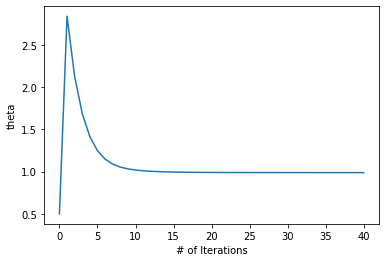

In [14]:
nabla_f = get_nabla_f(sigma_2, y)
X_0 = np.zeros((dim_X, dim_X))
avg_theta, thetas = sapg_scalar_homogeneous(theta_0, X_0, nabla_f, N)
plt.ylabel("theta")
plt.xlabel("# of Iterations")
plt.plot(thetas)
plt.savefig("SNR30.pdf")

In [15]:
# Define Params for the Algorithm
sigma_2 = 0.00067 #SNR = 40 -> sigma_2 = 0.00067
L_y = 1/sigma_2
lambd = min(5 * 1/L_y, 2.0) # currently L_y=5
gamma = 0.98 /(L_y + 1/lambd)

In [16]:
_, y = generate_data(np.sqrt(sigma_2))

40.01033154793883


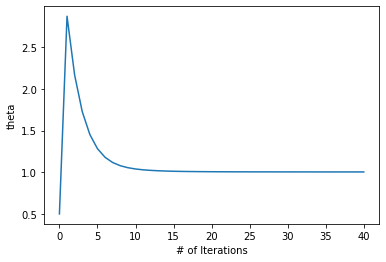

In [18]:
nabla_f = get_nabla_f(sigma_2, y)
X_0 = np.zeros((dim_X, dim_X))
avg_theta, thetas = sapg_scalar_homogeneous(theta_0, X_0, nabla_f, N)
plt.ylabel("theta")
plt.xlabel("# of Iterations")
plt.plot(thetas)
plt.savefig("SNR40.pdf")